In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("RestaurantVisitors.csv", parse_dates=True, index_col="date")
df.index.freq="D"

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [6]:
# get rid of the nans

In [7]:
df1=df.dropna()
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [10]:
cols=['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in cols:
    df1[col]=df1[col].astype(int)
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


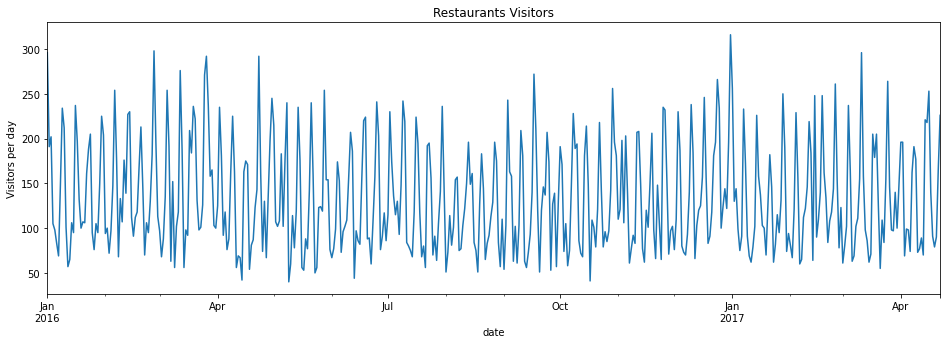

In [13]:
title="Restaurants Visitors"
ylabel="Visitors per day"
xlabel=''

ax = df1.total.plot(figsize=(16,5), title = title)
ax.autoscale(axis='x', tight=True)
plt.ylabel(ylabel)
plt.show()

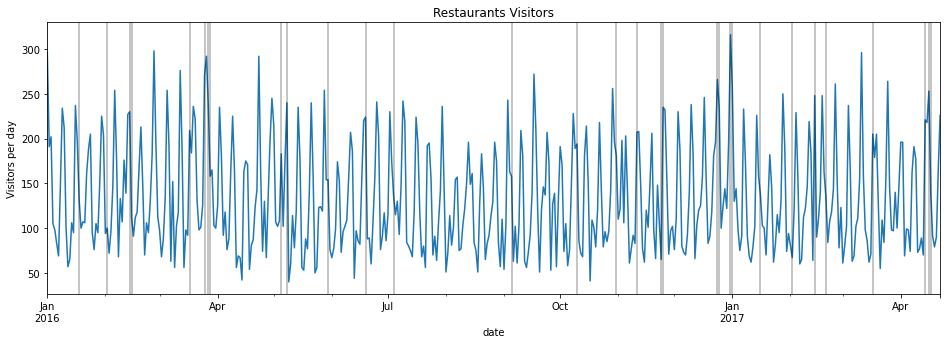

In [14]:
title="Restaurants Visitors"
ylabel="Visitors per day"
xlabel=''

ax = df1.total.plot(figsize=(16,5), title = title)
ax.autoscale(axis='x', tight=True)
for x in df1.query("holiday==1").index:
    ax.axvline(x=x, color='k', alpha=0.3)
plt.ylabel(ylabel)
plt.show()

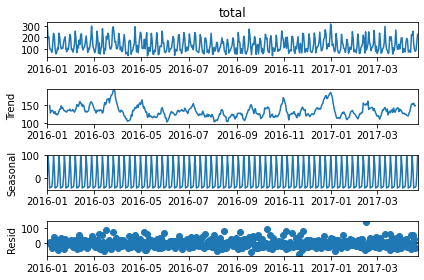

In [15]:
resd=seasonal_decompose(df1.total)
resd.plot();

In [21]:
resd.seasonal

date
2016-01-01    13.156784
2016-01-02    95.455291
2016-01-03    46.792178
2016-01-04   -42.809321
2016-01-05   -39.387052
                ...    
2017-04-18   -39.387052
2017-04-19   -38.887052
2017-04-20   -34.320828
2017-04-21    13.156784
2017-04-22    95.455291
Freq: D, Name: seasonal, Length: 478, dtype: float64

# Beginning of the task

In [27]:
s_index = int(0.8*df.shape[0])
s_index = 436
train = df1.iloc[:s_index]
test = df1.iloc[s_index:]

In [32]:
stepwise_fit = auto_arima(
    df1.total,
    max_order=8,
    d=1,
    D=1,
    m=7,
    max_p=4,
    max_q=5,
    max_P=2,
    max_Q=2,
    n_jobs=-1,
    stepwise=False,
    trace=True
)

Total fit time: 168.896 seconds


In [34]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2310.468
Date:                           Tue, 02 Jun 2020   AIC                           4634.937
Time:                                   16:23:23   BIC                           4664.006
Sample:                                        0   HQIC                          4646.373
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0026      0.002      1.710      0.087      -0.000       0.006
ar.L1          0.1164      0.046      2.538      0.011       0.027       0.206
ar.L2          0.1310      0.051      2.593      0.010       0.032       0.230
ar.L3          0.0743      0.046      1.626      0.104      -0.015       0.164
ma.L1         -0.9991      0.165     -6.073      0.000      -1.322      -0.677
ma.S.L7       -0.9995      1.062     -0.941      0.347      -3.081       1.082
sigma2      1000.3950   1056.831      0.947      0.344   -1070.955    3071.745
===================================================================================
Ljung-Box (Q):                       26.21   Jarque-Bera (JB):                97.92
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.82
Prob(H) (two-sided):                  0.66   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_total2 = SARIMAX(train.total, order=(3,1,1), seasonal_order=(0,1,1,7))
results_sarimax2 = model_total2.fit()
results_sarimax2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2108.042
Date:                           Tue, 02 Jun 2020   AIC                           4228.084
Time:                                   16:24:35   BIC                           4252.439
Sample:                               01-01-2016   HQIC                          4237.703
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1466      0.050      2.937      0.003       0.049       0.244
ar.L2          0.1114      0.056      1.996      0.046       0.002       0.221
ar.L3          0.0681      0.050      1.349      0.177      -0.031       0.167
ma.L1         -0.9794      0.016    -61.869      0.000      -1.010      -0.948
ma.S.L7       -0.9983      0.352     -2.840      0.005      -1.687      -0.309
sigma2      1025.1222    338.727      3.026      0.002     361.229    1689.016
===================================================================================
Ljung-Box (Q):                       22.47   Jarque-Bera (JB):               103.32
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.83
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_total = SARIMAX(train.total, order=(1,0,3), seasonal_order=(1,0,1,7))
results_sarimax = model_total.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 3)x(1, 0, [1], 7)   Log Likelihood               -2149.437
Date:                             Tue, 02 Jun 2020   AIC                           4312.874
Time:                                     16:19:45   BIC                           4341.418
Sample:                                 01-01-2016   HQIC                          4324.139
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.003    397.587      0.000       0.992       1.002
ma.L1         -0.8282      0.047    -17.582      0.000      -0.920      -0.736
ma.L2         -0.0430      0.069     -0.628      0.530      -0.177       0.091
ma.L3         -0.1095      0.052     -2.119      0.034      -0.211      -0.008
ar.S.L7        0.9995      0.001   1814.856      0.000       0.998       1.001
ma.S.L7       -0.9509      0.024    -39.008      0.000      -0.999      -0.903
sigma2      1062.5300     55.498     19.145      0.000     953.755    1171.305
===================================================================================
Ljung-Box (Q):                       25.56   Jarque-Bera (JB):               105.75
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.84
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model_total3 = SARIMAX(train.total, order=(0,1,2), seasonal_order=(0,1,1,7), enforce_invertibility=False) #?
results_sarimax3 = model_total3.fit()
results_sarimax3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 7)   Log Likelihood               -2111.981
Date:                             Tue, 02 Jun 2020   AIC                           4231.963
Time:                                     16:39:06   BIC                           4248.199
Sample:                                 01-01-2016   HQIC                          4238.376
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8253      0.048    -17.121      0.000      -0.920      -0.731
ma.L2         -0.1236      0.050     -2.497      0.013      -0.221      -0.027
ma.S.L7       -0.9613      0.027    -36.253      0.000      -1.013      -0.909
sigma2      1073.4010     54.031     19.866      0.000     967.502    1179.299
===================================================================================
Ljung-Box (Q):                       34.75   Jarque-Bera (JB):               102.88
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.83
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
start = len(train)
end = len(train) + len(test)-1
predictions = results_sarimax.predict(start=start, end=end, dynamic=False).rename("SARIMA (1, 0, 3)x(1, 0, [1], 7) Predictions")
predictions2 = results_sarimax2.predict(start=start, end=end, dynamic=False).rename("SARIMAX(3, 1, 1)x(0, 1, 1, 7) Predictions")
predictions3 = results_sarimax3.predict(start=start, end=end, dynamic=False).rename("SARIMAX(0, 1, 2)x(0, 1, 1, 7) Predictions")


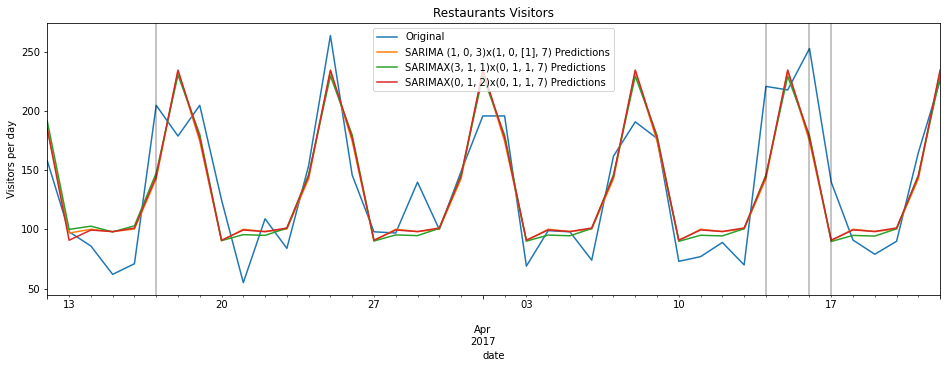

In [55]:
title="Restaurants Visitors"
ylabel="Visitors per day"
xlabel=''

ax = test.total.plot(figsize=(16,5), title = title, label="Original")
predictions.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)
ax.autoscale(axis='x', tight=True)
for x in test.query("holiday==1").index:
    ax.axvline(x=x, color='k', alpha=0.3)
plt.legend()
plt.ylabel(ylabel)
plt.show()

In [52]:
# (1,0,3)x(1,0,1,7)
error_rmse=rmse(test.total, predictions)
print(error_rmse)

31.419260334410723


In [53]:
# (3,1,1)x(0,1,1,7)
error_rmse2=rmse(test.total, predictions2)
print(error_rmse2)

30.233455188385154


In [54]:
# (0,1,2)x(0,1,1,7)
error_rmse3=rmse(test.total, predictions3)
print(error_rmse3)

31.01104126880762


# End of task on the lecture was choosed (0,1,2)x(0,1,1,7)
Ksenias model 212 1117

In [56]:
model_exog=SARIMAX(train['total'], exog=train.holiday, order=(0,1,2), seasonal_order=(0,1,1,7), enforce_invertibility=False)
results_exog = model_exog.fit()
results_exog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 7)   Log Likelihood               -2045.763
Date:                             Tue, 02 Jun 2020   AIC                           4101.527
Time:                                     16:54:44   BIC                           4121.822
Sample:                                 01-01-2016   HQIC                          4109.542
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.6055      3.852     17.812      0.000      61.056      76.155
ma.L1         -0.8072      0.048    -16.868      0.000      -0.901      -0.713
ma.L2         -0.1622      0.050     -3.223      0.001      -0.261      -0.064
ma.S.L7       -0.9583      0.027    -35.129      0.000      -1.012      -0.905
sigma2       786.2655     44.923     17.503      0.000     698.218     874.313
===================================================================================
Ljung-Box (Q):                       34.36   Jarque-Bera (JB):                19.64
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.23
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
exog_forecast=test[['holiday']]
predictions = results_exog.predict(start=start, end=end, exog=exog_forecast, dynamic=False).rename("exog predictions")

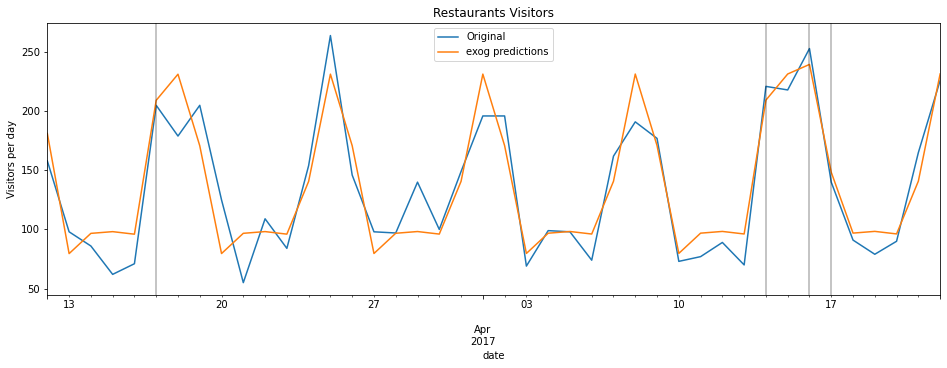

In [58]:
title="Restaurants Visitors"
ylabel="Visitors per day"
xlabel=''

ax = test.total.plot(figsize=(16,5), title = title, label="Original")
predictions.plot(legend=True)

ax.autoscale(axis='x', tight=True)
for x in test.query("holiday==1").index:
    ax.axvline(x=x, color='k', alpha=0.3)
plt.legend()
plt.ylabel(ylabel)
plt.show()

In [59]:
rmse(test.total, predictions)

23.09175801379003